In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def cv2_imshow(image) :
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

## Problema 1 

In [3]:
def binarize(image) :
  grayscale_image = image.copy()
  grayscale_image = cv2.cvtColor(grayscale_image, cv2.COLOR_BGR2GRAY)
  (thresh, im_bw) = cv2.threshold(grayscale_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  return im_bw

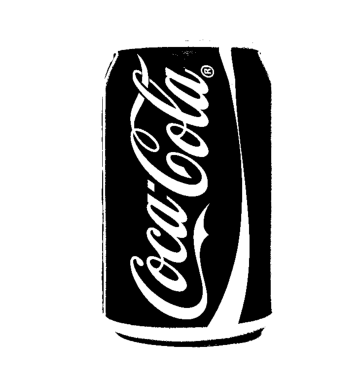

In [4]:
image = cv2.imread('images/coke-can.png')
cv2_imshow(binarize(image))

## Problema 2

In [5]:
def operate_images(image_a, image_b, operator) :
  image_1 = binarize(image_a)
  image_2 = binarize(image_b)

  image_1 = cv2.resize(image_1, (200, 200), interpolation = cv2.INTER_AREA)
  image_2 = cv2.resize(image_2, (200, 200), interpolation = cv2.INTER_AREA)

  image = image_1.copy()

  if operator == 'add' or operator == 'or':
    image = cv2.bitwise_or(image_1, image_2)

  if operator == 'sub':
    image = image_1 - image_2

  if operator == 'and':
    image = cv2.bitwise_and(image_1, image_2)

  if operator == 'xor' :
    image = cv2.bitwise_xor(image_1, image_2)

  return image

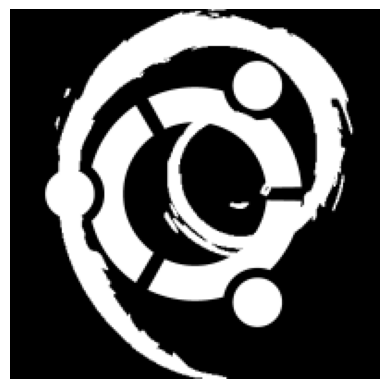

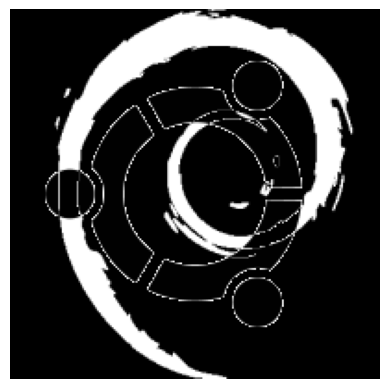

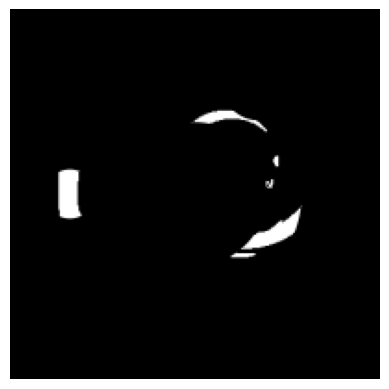

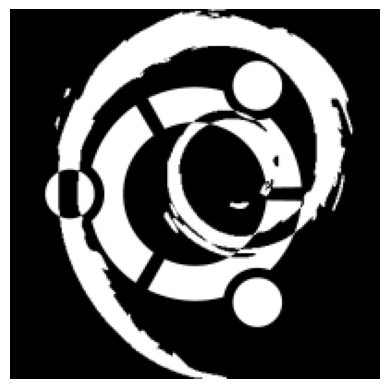

In [6]:
debian_image = cv2.imread('images/debian.png')
ubuntu_image = cv2.imread('images/ubuntu.png')
cv2_imshow(operate_images(debian_image, ubuntu_image, 'add'))
cv2_imshow(operate_images(debian_image, ubuntu_image, 'sub'))
cv2_imshow(operate_images(debian_image, ubuntu_image, 'and'))
cv2_imshow(operate_images(debian_image, ubuntu_image, 'xor'))

## Problema 3

In [7]:
def graph_image(image):
  grayscale_image = image.copy()
  grayscale_image = cv2.cvtColor(grayscale_image, cv2.COLOR_BGR2GRAY)

  (height, width) = grayscale_image.shape

  ys = range(height)
  xs = range(width)
  zs = []


  for y in range(height):  
    for x in range(width): 
      zs.append( grayscale_image[y][x])
    

  _xx, _yy = np.meshgrid(xs, ys)

  x, y = _xx.ravel(), _yy.ravel()

  fig = plt.figure(figsize=(8, 3))
  ax1 = fig.add_subplot(121, projection='3d')

  bottom = np.zeros_like(zs)
  width = depth = 1

  ax1.bar3d(x, y, bottom, width, depth, zs, shade=True)
  ax1.set_title('Histogram')

  plt.show()

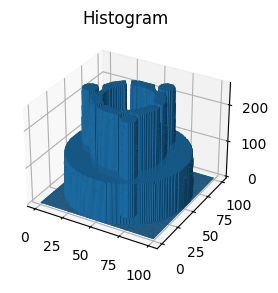

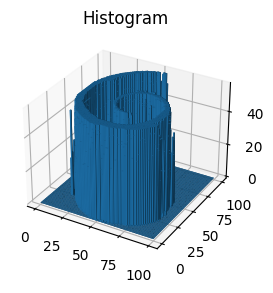

In [8]:
ubuntu_image = cv2.imread('images/ubuntu.png')

ubuntu_image = cv2.resize(debian_image, (100, 100), interpolation = cv2.INTER_AREA)
graph_image(ubuntu_image)


debian_image = cv2.imread('images/debian.png')

debian_image = cv2.resize(debian_image, (100, 100), interpolation = cv2.INTER_AREA)
graph_image(debian_image)

## Problema 4

In [24]:
def transform_negative(image) :
    img_neg = 1 - image

    return img_neg


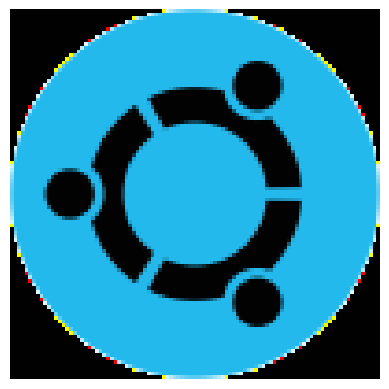

In [27]:
ubuntu_image = cv2.imread('images/ubuntu.png')

ubuntu_image = cv2.resize(ubuntu_image, (100, 100), interpolation = cv2.INTER_AREA)

transformed = transform_negative(ubuntu_image)

cv2_imshow(transformed)


In [28]:
def transform_log(image) :

    c = 255/(np.log(1 + np.max(image)))
    log_transformed = c * np.log(1 + image)
    
    # Specify the data type.
    log_transformed = np.array(log_transformed, dtype = np.uint8)

    return log_transformed


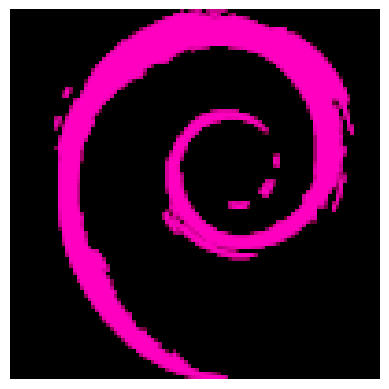

In [31]:
image_log = transform_log(debian_image)

cv2_imshow(image_log)


## Problema 5

In [47]:
def apply_filter(image, filter_matrix):
    filter = np.array (filter_matrix)
    result = cv2.filter2D (image, -1, filter) 
    return result


In [105]:
def plot_images(images):

    y_length = len(images)
    x_length = len(images[0])

    f, axarr = plt.subplots(y_length,x_length)

    if (y_length == 1) :
        
        for x in range(x_length) :
            image = images[0][x]
            axarr[x].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            axarr[x].axis("off")

        return
    

    for y in range(y_length) :
         for x in range(x_length) :
            image = images[y][x]
            axarr[y][x].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            axarr[y][x].axis('off')


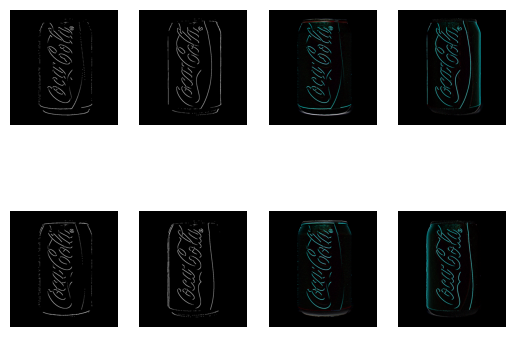

In [115]:
coke_image = cv2.imread('images/coke-can.png')

images = []
gradients = []
gradients2 = []

images.append(gradients)
images.append(gradients2)

grad_est = [[1, 0, -1], [2, 0, -2], [1, 0, -1]]
grad_north = [[-1, -2, -1], [0,0,0], [1,2,1]]
grad_sur = [[1, 2, 1], [0,0,0], [-1,-2,-1]]
grad_west = [[-1, 0, 1], [-2, 0, 2], [-1,0,1]]


gradients.append(apply_filter(binarize(coke_image), grad_north))
gradients.append(apply_filter(binarize(coke_image), grad_west))


gradients2.append(apply_filter(binarize(coke_image), grad_sur))
gradients2.append(apply_filter(binarize(coke_image), grad_est))


gradients.append(apply_filter(coke_image, grad_north))
gradients.append(apply_filter(coke_image, grad_west))


gradients2.append(apply_filter(coke_image, grad_sur))
gradients2.append(apply_filter(coke_image, grad_est))



plot_images(images)




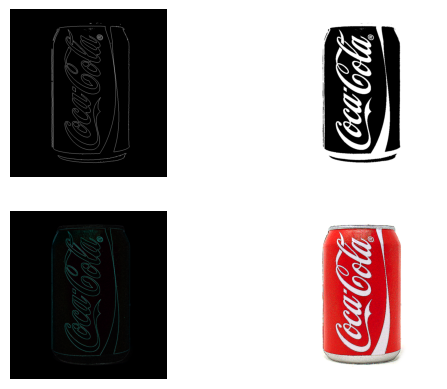

In [117]:
images = []
laplacian = []
laplacian2 = []


images.append(laplacian)

images.append(laplacian2)


laplacian_3_3 = [[0, -1, 0], [-1, 4, -1], [0, -1, 0]]
laplacian_5_5 = [[0,0, -1, 0,0], [0,-1,-2,-1,0], [-1,-2,17, -2, -1],[0,-1,-2,-1,0],[0,0,-1,0,0]]


laplacian.append(apply_filter(binarize(coke_image), laplacian_3_3))
laplacian.append(apply_filter(binarize(coke_image), laplacian_5_5))
laplacian2.append(apply_filter((coke_image), laplacian_3_3))
laplacian2.append(apply_filter((coke_image), laplacian_5_5))


plot_images(images)

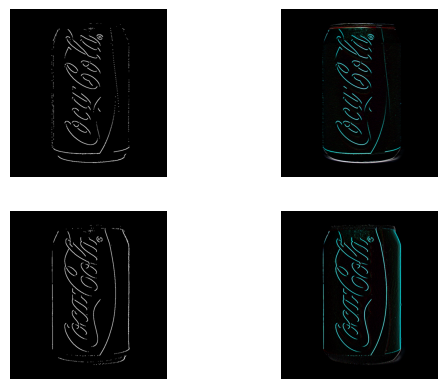

In [120]:
images = []
sobel = []
sobel2 = []


images.append(sobel)
images.append(sobel2)


horizontal = [[-1, -2, -1], [0,0,0], [1, 2, 1]]
vertical = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]


sobel.append(apply_filter(binarize(coke_image), horizontal))
sobel2.append(apply_filter(binarize(coke_image), vertical))
sobel.append(apply_filter((coke_image), horizontal))
sobel2.append(apply_filter((coke_image), vertical))


plot_images(images)